## Carga dos dados

In [2]:
import pandas as pd 

In [3]:
temperaturas = pd.read_csv('temps.csv')

In [4]:
temperaturas.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


## Análise Exploratória

In [5]:
print('Dimensões dos dataset temps: ', temperaturas.shape)

Dimensões dos dataset temps:  (348, 9)


In [6]:
temperaturas.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [7]:
print('Quantos dias do ano foram utilizados: ', 348/365 * 100, '%')

Quantos dias do ano foram utilizados:  95.34246575342465 %


In [8]:
temperaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [9]:
from datetime import datetime

years = temperaturas['year']
months = temperaturas['month']
days = temperaturas['day']

# Formato americano para a data: yyyy-mm-dd
dates=[str(year) + '-' + str(month) + '-' + str(day) for year, month, day in zip(years, months, days)]
dates=[datetime.strptime(date, '%Y-%m-%d') for date in dates]

Text(0.5, 1.0, 'Estimada pelo amigo')

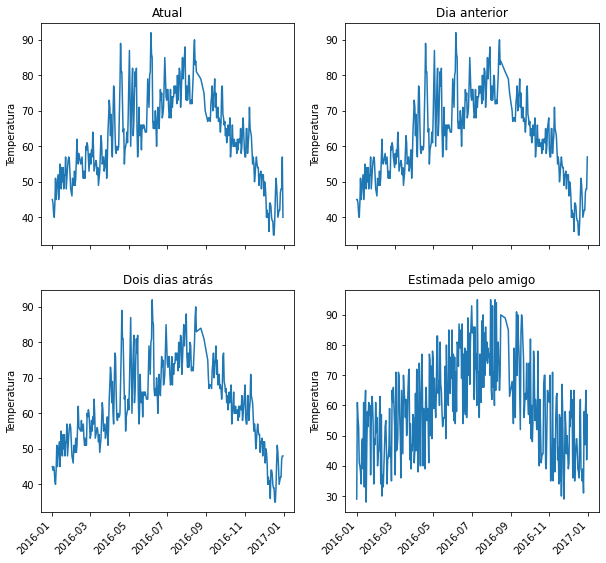

In [10]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.autofmt_xdate(rotation=45)

_ = ax1.plot(dates, temperaturas['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperatura'); ax1.set_title('Atual')

_ = ax2.plot(dates, temperaturas['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperatura'); ax2.set_title('Dia anterior')

_ = ax3.plot(dates, temperaturas['temp_2'])
ax3.set_xlabel(''); ax3.set_ylabel('Temperatura'); ax3.set_title('Dois dias atrás')

_ = ax4.plot(dates, temperaturas['friend'])
ax4.set_xlabel(''); ax4.set_ylabel('Temperatura'); ax4.set_title('Estimada pelo amigo')

## Preparação dos dados

In [11]:
# Transforma o dado categorico em númerico (dias da semana)
temperaturas = pd.get_dummies(temperaturas)
temperaturas.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [12]:
print('Dimensões do dataset temps: ', temperaturas.shape)

Dimensões do dataset temps:  (348, 15)


## Treinamento e Teste do Modelo

In [13]:
X = temperaturas.drop('actual', axis=1).values
y = temperaturas['actual'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [88]:
print('X_train shape', X_train.shape)
print('X_test shape', X_train.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (278, 14)
X_test shape (278, 14)
y_train shape (278,)
y_test shape (70,)


## Base de comparação

In [89]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


colunas = list(temperaturas.columns)
y_hist = X_test[:, colunas.index('average')]
print('MAE :', mean_absolute_error(y_test, y_hist))
print('MSE :', mean_squared_error(y_test, y_hist))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hist)))

MAE : 5.085714285714285
MSE : 55.10257142857142
RMSE: 7.42311063022581


## Treinamento do modelo

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
y_pred = rf.predict(X_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 3.6761428571428563
MSE : 24.504938571428568
RMSE: 4.950246314217967


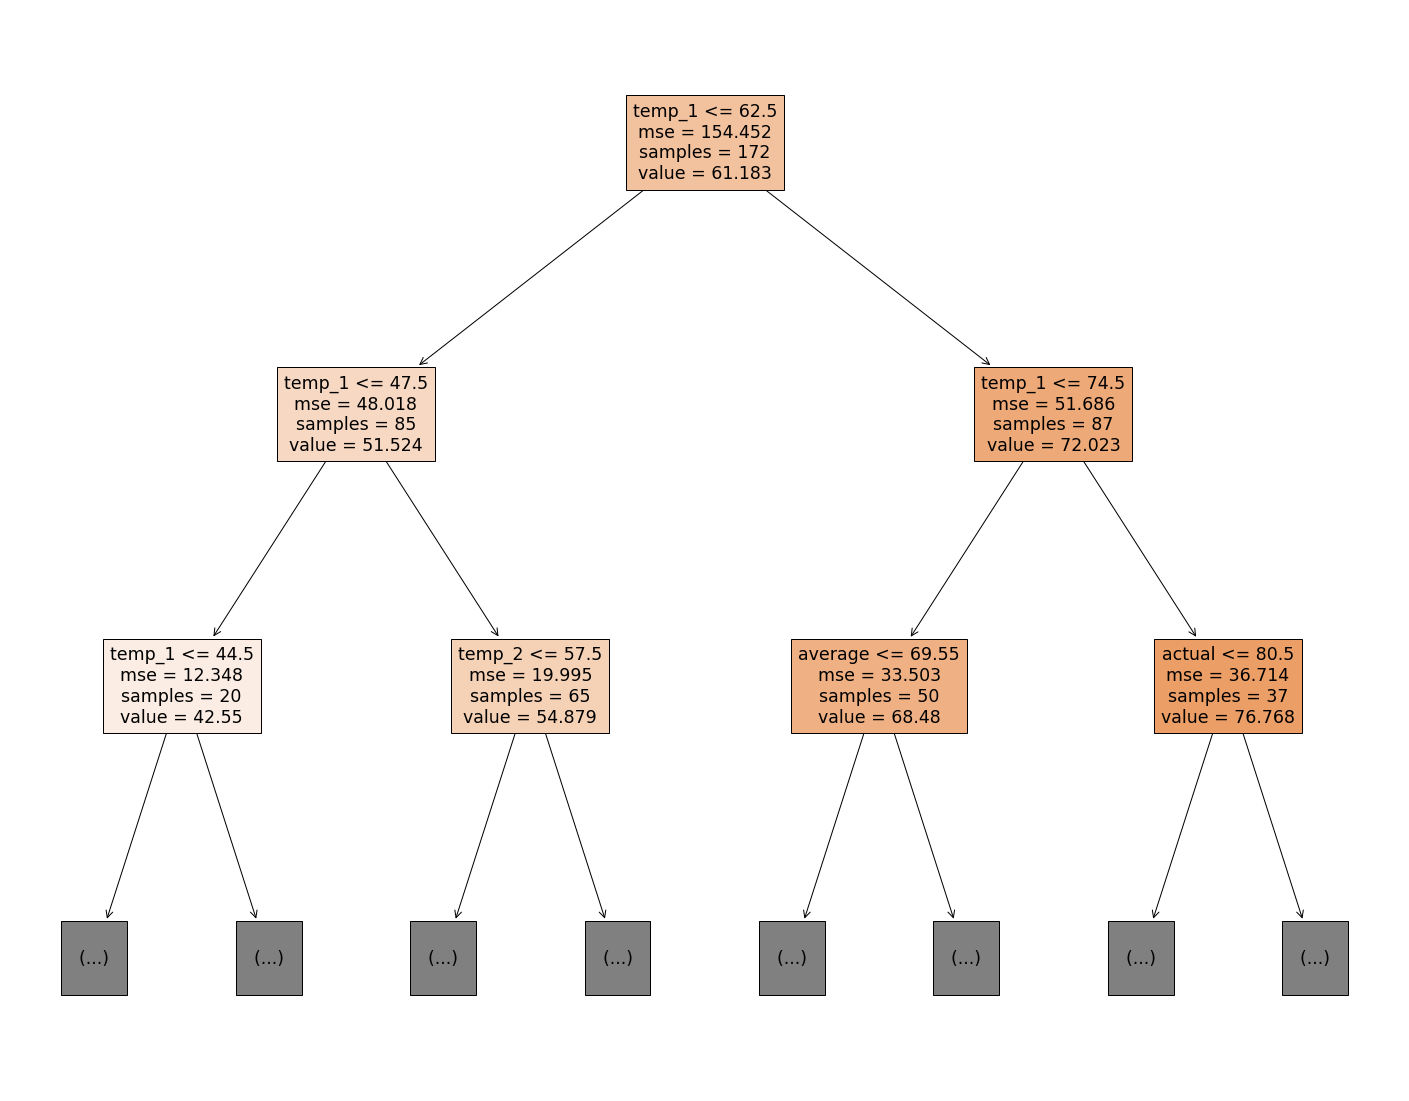

In [92]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25, 20))
# Escolhe uma arvore em toda a floresta, nesse caso a de número 5
_ = plot_tree(rf.estimators_[5], filled=True, feature_names=colunas, max_depth=2)

## Importância das variáveis independentes

In [93]:
importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)
for v, i in variaveis_importancias:
    print(f'Variavel: {v:10} - Importancia: {i}')

Variavel: temp_1     - Importancia: 0.68791653128909
Variavel: average    - Importancia: 0.21329159575273998
Variavel: actual     - Importancia: 0.02495195957588168
Variavel: day        - Importancia: 0.02308834198936803
Variavel: temp_2     - Importancia: 0.018771227843264716
Variavel: month      - Importancia: 0.01163648409497471
Variavel: friend     - Importancia: 0.00400220671748231
Variavel: week_Sat   - Importancia: 0.0034077871414133223
Variavel: week_Fri   - Importancia: 0.003360035949732505
Variavel: week_Mon   - Importancia: 0.0032016465624655306
Variavel: week_Thurs - Importancia: 0.0023304036649528445
Variavel: week_Tues  - Importancia: 0.0022475680514921917
Variavel: week_Sun   - Importancia: 0.0017942113671419375
Variavel: year       - Importancia: 0.0


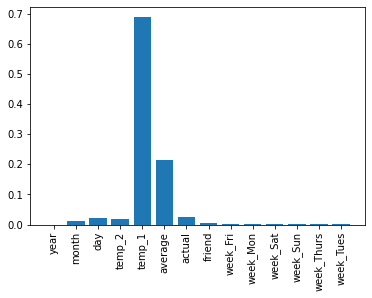

In [30]:
X_valores = list(range(len(importancias)))
_=plt.bar(X_valores, importancias)
colunas = colunas[:-1]
_=plt.xticks(X_valores, colunas, rotation='vertical')

## Variaveis mais importantes

In [33]:
rf_imp = RandomForestRegressor(n_estimators=100, random_state=42)
indices = [colunas.index('temp_1'), colunas.index('average')]
X_train_imp = X_train[:, indices]
X_test_imp = X_test[:, indices]
rf_imp.fit(X_train_imp, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = rf_imp.predict(X_test_imp)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 3.901814285714284
MSE : 26.735925360317452
RMSE: 5.170679390594378


## Avaliação de outros modelos

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
RANDOM_STATE = 42

def build_regressors():
    regressors = []

    regressors.append(
        ('lr', 
        LinearRegression(),
        {'fit_intercept': [True, False]})
    )

    regressors.append(
        ('svr',
        SVR(),
        {'C': [0.1, 1, 10],
         'gamma': [0.00001, 0.0001, 0.001, 0.01, 1],
         'epsilon': [0.0001, 0.005, 0.001, 1, 5, 10]})
    )

    return regressors

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

train_results = []
test_results = []
names = []

scoring = 'neg_root_mean_squared_error'

regressors = build_regressors()
kfold = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

for name, regressor, params in regressors:
    print(f">>> pregressor : {name}")

    # Treinamento
    gs = GridSearchCV(regressor, param_grid=params, scoring=scoring, verbose=1)
    gs.fit(X_train, y_train)
    cv_results = cross_val_score(gs, X_train, y_train, cv=kfold, scoring=scoring) # análise
    names.append(name)
    train_results.append(abs(cv_results))

    # Teste
    y_pred = gs.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    test_results.append(rmse)



>>> pregressor : lr
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
>>> pregressor : svr
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits


Text(0.5, 0, 'Regressores')

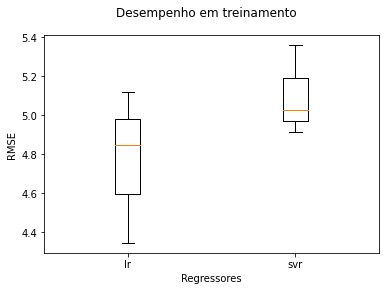

In [67]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em treinamento')
_ = plt.boxplot(train_results)
ax.set_xticklabels(names)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')

Text(0.5, 0, 'Regressores')

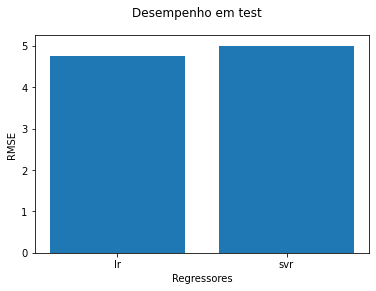

In [69]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em test')
_ = plt.bar(names, test_results)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')